<a href="https://colab.research.google.com/github/esha345/ML_Tasks/blob/main/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D,  BatchNormalization, Dense, Flatten, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
label_dict = {0:'Airplane',1:'Automobile',2:'Bird',3:'Cat',4:'Deer',5:'Dog',6:'Frog',7:'Horse',8:'Ship',9:'Truck'}

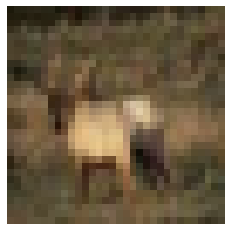

Deer


In [ ]:
index = 3
plt.axis('off')
plt.imshow(X_train[index])
plt.show()
print(label_dict[Y_train[index,0]])

In [ ]:
Y_train[0]

array([6], dtype=uint8)

In [ ]:
#Preprocessing
def preprocess_images(X):
  return X/255.0

In [ ]:
#DO NOT RUN THIS MORE THAN ONCE
X_train = preprocess_images(X_train)
X_test =  preprocess_images(X_test)

In [ ]:
def make_cnn():
  model = Sequential()
  model.add(Conv2D(32,(3,3),strides = (1,1),padding="same",activation="relu",input_shape=(32,32,3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32,(3,3),strides = (1,1),padding="same",activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(2,2))
  model.add(Dropout(0.2))
  model.add(Conv2D(64,(3,3),strides = (1,1),padding="same",activation="relu"))
  model.add(BatchNormalization())
  model.add(Conv2D(64,(3,3),strides = (1,1),padding="same",activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(2,2))
  model.add(Dropout(0.3))

  model.add(Conv2D(128,(3,3),strides = (1,1),padding="same",activation="relu"))
  model.add(BatchNormalization())
  model.add(Conv2D(128,(3,3),strides = (1,1),padding="same",activation="relu"))
  model.add(BatchNormalization())
  model.add(MaxPool2D(2,2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(10,activation='softmax'))
  return model

In [ ]:
model = make_cnn()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history= model.fit(X_train,Y_train,batch_size=128,epochs=30,validation_data=(X_test,Y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 16s 327us/sample - loss: 1.8375 - acc: 0.4296 - val_loss: 2.8173 - val_acc: 0.1977
Epoch 2/30
50000/50000 [==============================] - 9s 170us/sample - loss: 1.2035 - acc: 0.6046 - val_loss: 0.9558 - val_acc: 0.6699
Epoch 3/30
50000/50000 [==============================] - 9s 171us/sample - loss: 0.9581 - acc: 0.6822 - val_loss: 1.0672 - val_acc: 0.6390
Epoch 4/30
50000/50000 [==============================] - 9s 171us/sample - loss: 0.8166 - acc: 0.7227 - val_loss: 0.8363 - val_acc: 0.7124
Epoch 5/30
50000/50000 [==============================] - 9s 170us/sample - loss: 0.7218 - acc: 0.7532 - val_loss: 0.7821 - val_acc: 0.7352
Epoch 6/30
50000/50000 [==============================] - 9s 171us/sample - loss: 0.6612 - acc: 0.7724 - val_loss: 0.6423 - val_acc: 0.7830
Epoch 7/30
50000/50000 [==============================] - 9s 171us/sample - loss: 0.6047 - acc: 0.7893 - val_

In [ ]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

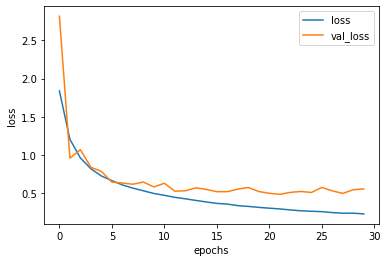

In [ ]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

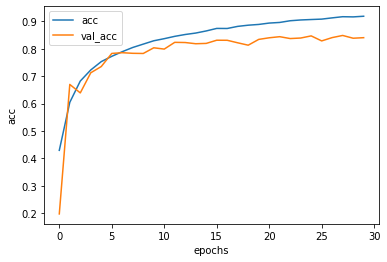

In [ ]:
plt.plot(history.history["acc"],label="acc")
plt.plot(history.history["val_acc"],label="val_acc")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("acc")
plt.show()

In [ ]:
n_images = 10001
y_preds = model.predict(X_test[:n_images])
y_preds = np.array([[np.argmax(y)] for y in y_preds])
confusion_matrix(Y_test,y_preds) #Horizontal is y_pred, vertical is y_true

array([[832,  16,  21,  13,  17,   4,  14,   8,  47,  28],
       [  7, 929,   0,   3,   1,   1,   4,   0,  17,  38],
       [ 57,   5, 706,  31,  55,  40,  67,  27,  10,   2],
       [ 13,   4,  40, 647,  46, 120,  67,  32,  16,  15],
       [  2,   2,  19,  26, 853,   6,  36,  48,   6,   2],
       [ 10,   3,  23,  79,  47, 770,  15,  42,   4,   7],
       [  7,   1,  13,  20,  16,   4, 928,   6,   3,   2],
       [ 11,   1,  10,  15,  25,  24,   5, 901,   0,   8],
       [ 33,   8,   2,   2,   2,   3,   6,   2, 925,  17],
       [ 14,  43,   3,   3,   1,   2,   4,   3,  14, 913]])

In [ ]:
print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1000
           1       0.92      0.93      0.92      1000
           2       0.84      0.71      0.77      1000
           3       0.77      0.65      0.70      1000
           4       0.80      0.85      0.83      1000
           5       0.79      0.77      0.78      1000
           6       0.81      0.93      0.86      1000
           7       0.84      0.90      0.87      1000
           8       0.89      0.93      0.91      1000
           9       0.88      0.91      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



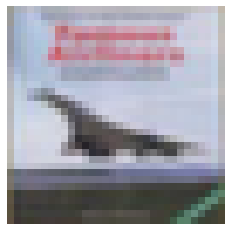

Airplane


In [ ]:
index = 3
plt.axis('off')
plt.imshow(X_test[index])
plt.show()
print(label_dict[Y_test[index,0]])